# Spectral Properties

In [2]:
from datetime import timedelta

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import welch
import seaborn as sns

sns.set()

In [3]:
tag = "rfr"

df_dataset = pd.read_csv(
    f"../data/processed/{tag}/processed_daysahead3_R000.csv",
    index_col=0,
)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset.head()

,forward_time,forward_Vp_pred,forward_Vp_obs,forward_loc,forward_scale,forward_shape,forward_crps
current_time,,,,,,,
2010-01-04 06:00:00,2010-01-07 00:00:00,316.100000,289.23,266.120778,102.774443,4.826533,NaN
2010-01-04 12:00:00,2010-01-07 06:00:00,309.375000,297.19,274.357483,105.203490,4.098651,NaN
2010-01-04 18:00:00,2010-01-07 12:00:00,302.650000,286.61,268.892979,109.250224,5.604289,NaN
2010-01-05 00:00:00,2010-01-07 18:00:00,306.100000,283.42,263.770680,107.342977,5.216177,NaN
2010-01-05 06:00:00,2010-01-08 00:00:00,317.327273,309.38,265.250893,109.555652,5.626130,NaN


In [4]:
# sampling frequency (Hz)
# infer sampling interval from the index
dt = (df_dataset.index[1] - df_dataset.index[0]).total_seconds() / timedelta(
    days=27
).total_seconds()
fs = 1.0 / dt

# compute PSD with Welch’s method
freqs, psd = welch(df_dataset["forward_scale"], fs=fs, nperseg=256)

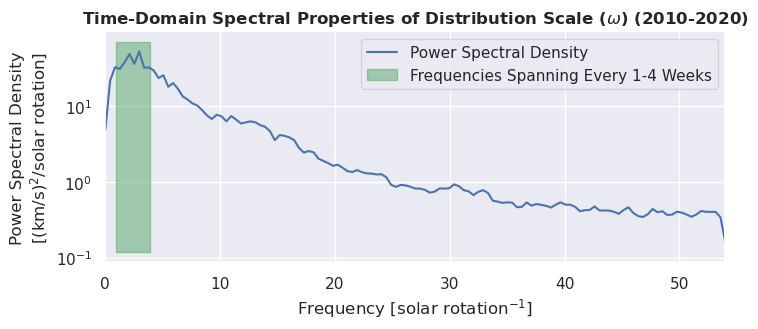

In [21]:
# plot
plt.figure(figsize=(8, 3))
plt.semilogy(freqs, psd, label="Power Spectral Density")  # semilog-y is common for PSD
plt.title(
    f"Time-Domain Spectral Properties of Distribution Scale ($\omega$) (2010-2020)",
    fontweight="bold",
)
plt.xlabel("Frequency [solar rotation$^{-1}$]")
plt.ylabel("Power Spectral Density\n[(km/s)$^2$/solar rotation]")
# plt.axvline(2, color="k", label="Period = 1/2 Solar Rotation")

start = 27 / 7
stop = 27 / 28
lo, hi = plt.ylim()

plt.fill_between(
    [start, stop],
    [lo, lo],
    [hi, hi],
    color="C2",
    alpha=0.5,
    label="Frequencies Spanning Every 1-4 Weeks",
)

plt.xlim(0, freqs.max())
plt.legend()
plt.savefig("../plots/spectral_properties.png", dpi=300, bbox_inches="tight")